## NAME : Mithun Muralidhar
## ASU ID: 1211309824

# Homework 2 Problem 2
Please finish the following code and copy the nessary result to the report for the discussion

### Part 0, data generation function
We would like to first import some necessary Libraries for this task and then write down the data generation function as follow. 

We also create the polynomial design matrix up to order k, which is given in polynomialfeatures function. 


In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
%matplotlib inline

def ftrue(x):
    return np.sin(x)
def generatedata(ndata,seed):
    rng = np.random.RandomState(seed)
    Xtrain = np.linspace(0,1,ndata)
    Ytrain = np.sin(Xtrain*10.0) + 0.1 * rng.randn(ndata)
    return Xtrain,Ytrain

X,Y = generatedata(100,12)


def polynomialfeatures(x,k):
    if len(x.shape) == 1:
        x = x[:,np.newaxis] 
    index = range(1,k+1)
    X = np.concatenate([x**i for i in index],1)
    return X



### Part 1: Use BIC for tuning parameter selection
Please feel free to use the sklearn library [sklearn.linear_model.Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) to solve the Ridge regression in this section to find the tuning parameter selection. We don't need to do standarlization in this example since all $x^i\in [0,1]$ if $x \in [0,1]$, which are already in the same scale.

(a) Please compute and plot on how do the $RSS=\|y-\hat{y}\|^{2}$ and degree of freedom $df=trace(X(X^{T}X+\lambda I)^{-1}X^{T})$ change according to the tuning parameter $\lambda$. 




In [55]:
from sklearn import preprocessing
lambdaall = [1e-13, 1e-12,1e-11,1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

RSS = np.array(lambdaall)*0
df = np.array(lambdaall)*0

ridge=Ridge()
X=polynomialfeatures(X,10)

for i,lambda1 in enumerate(lambdaall):
    ridge.set_params(alpha=lambda1)
    ridge.fit(X,Y)
    pred=ridge.predict(X)
    diff=np.linalg.norm(Y-pred)
    
    RSS[i]=diff**2
    df[i]=np.trace(np.matmul(X,(np.matmul(np.linalg.inv(np.dot(X.T,X)+ np.dot(lambda1,np.eye(10))), X.T))))
    print(i, 'RSS:', RSS[i], 'df:', df[i])
# Please complete this part, please use np.trace to compute the trace of a matrix
   

0 RSS: 0.970792847637 df: 9.82308656395
1 RSS: 0.975895498409 df: 9.30920279796
2 RSS: 0.980540837598 df: 8.96050627987
3 RSS: 0.984653817296 df: 8.52024853314
4 RSS: 0.997057821527 df: 7.54431135548
5 RSS: 1.93155095369 df: 5.20387301475
6 RSS: 7.02934916923 df: 4.56413471694
7 RSS: 16.6285292603 df: 3.86486735182
8 RSS: 33.6372072148 df: 2.3290027998
9 RSS: 41.6838828757 df: 1.75074530968
10 RSS: 43.1482596684 df: 1.48786666756
11 RSS: 43.9350989812 df: 1.21930631764


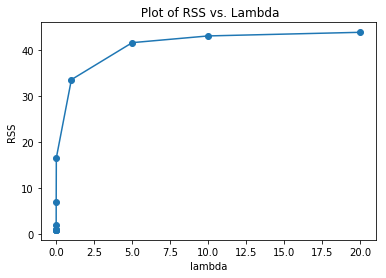

In [56]:
# Plot of RSS vs. lambda

plt.scatter(lambdaall,RSS)
plt.plot(lambdaall, RSS)
plt.xlabel("lambda")
plt.ylabel("RSS")
plt.title(" Plot of RSS vs. Lambda")
plt.savefig("RSS&lambda.png")


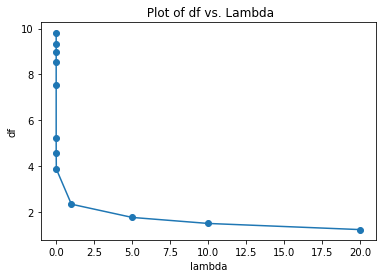

In [57]:
#Plot of df vs. lambda
plt.scatter(lambdaall, df)
plt.plot(lambdaall, df)
plt.xlabel("lambda")
plt.ylabel("df")
plt.title(" Plot of df vs. Lambda")
plt.savefig('df&lambda.png')

(b) Please plot the following BIC criterion function for each tuning parameter $\lambda$. $BIC=n\log(RSS)+df\cdot\log(n)$

383.886465286


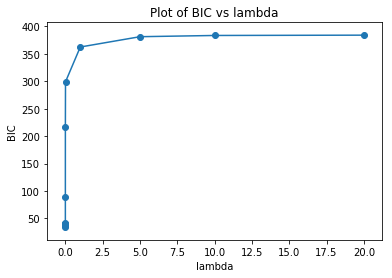

In [58]:
BIC=np.array(lambdaall)*0
for i,lambda1 in enumerate(lambdaall):
    BIC[i]=100* np.log(RSS[i])+ df[i]*np.log(100)
print(BIC[i])
plt.plot(lambdaall,BIC)
plt.scatter(lambdaall,BIC)
plt.xlabel("lambda")
plt.ylabel("BIC")
plt.title("Plot of BIC vs lambda")
plt.savefig('BIC.png')

### Part 3 Implement your own Cross-validation

Please use the K-fold function in sklearn as [sklearn.model_selection.KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to perform cross-validation. 

In [59]:
p = 30
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=50,shuffle=True)

nalpha = 30
allalpha=  [1e-13, 1e-12,1e-11,1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
nalpha = len(allalpha)
valscore = np.zeros((nalpha,50))
ridge_1=Ridge(normalize=True)
for i,alpha in enumerate(allalpha):
    for j,(train_index, val_index) in enumerate(kf.split(X)):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = Y[train_index], Y[val_index]
    ridge_1.set_params(alpha=alpha)
    ridge_1.fit(X_train,y_train)
    pred=ridge_1.predict(X_val)
    mse=mean_squared_error(y_val,pred)
    print("RMSE for", "alpha:", alpha, "is", mse)

RMSE for alpha: 1e-13 is 0.0205038393463
RMSE for alpha: 1e-12 is 0.0192003954011
RMSE for alpha: 1e-11 is 0.0279931797544
RMSE for alpha: 1e-10 is 0.0128344203358
RMSE for alpha: 1e-08 is 0.00472711123718
RMSE for alpha: 0.0001 is 0.114866152445
RMSE for alpha: 0.001 is 0.0818382173754
RMSE for alpha: 0.01 is 0.188240408327
RMSE for alpha: 1 is 0.246155460766
RMSE for alpha: 5 is 1.2031345625
RMSE for alpha: 10 is 0.760960143778
RMSE for alpha: 20 is 0.791595747602


Best alpha/lambda for the model is alpha 1e-08 with RMSE: 0.00472711123718